In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("/content/Fraud_check.csv")
data


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# Data Exploration
# check null values

data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [4]:
data.isnull().sum()


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
#  Descriptive Analysis
data.shape

(600, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
data[data.duplicated].shape

(0, 6)

In [9]:
data[data.duplicated]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [10]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"

df1=data.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [12]:
numerical_features = data.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

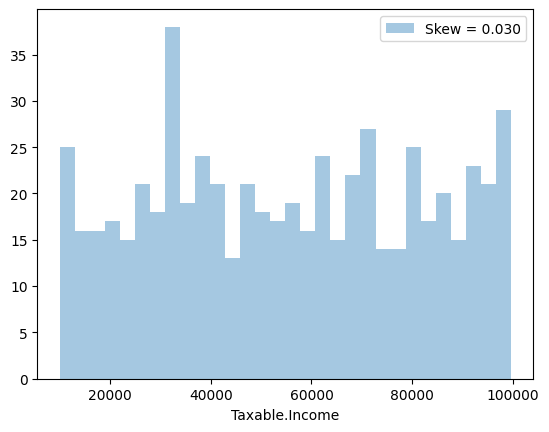

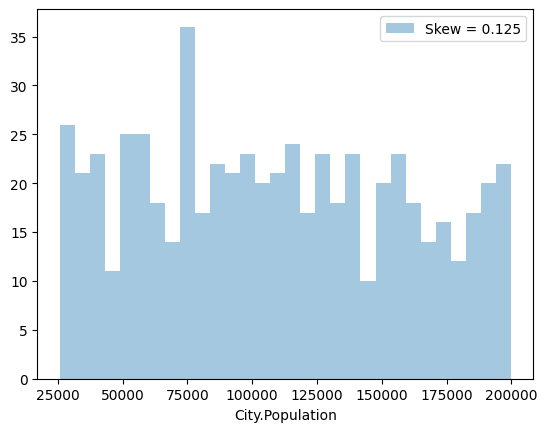

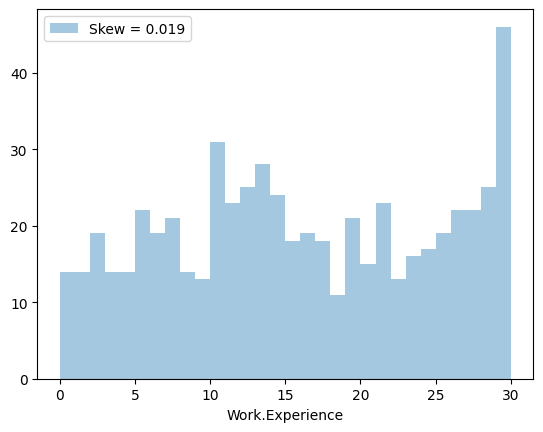

In [13]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<Axes: >

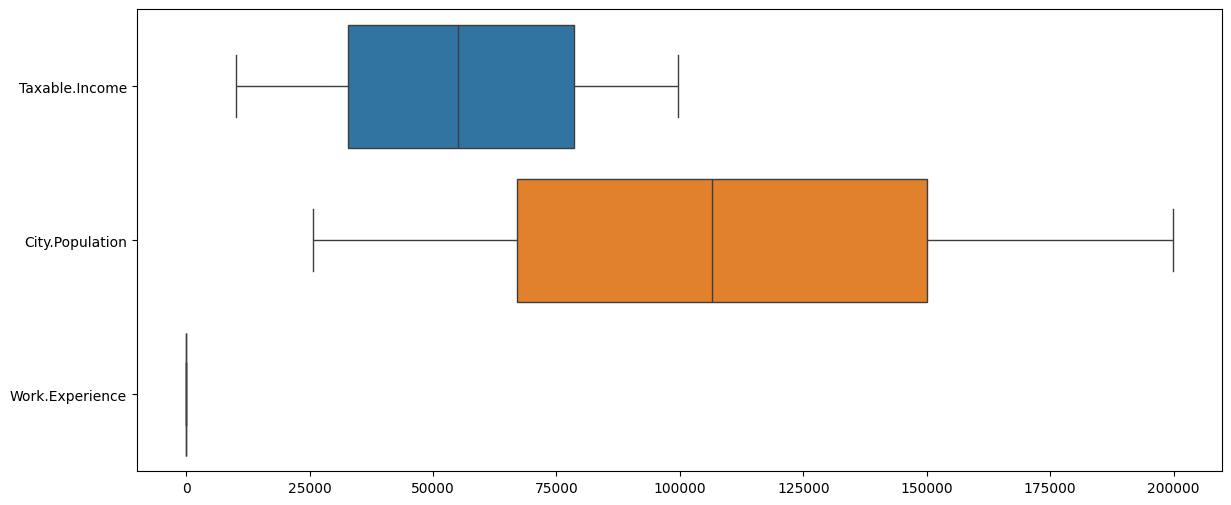

In [14]:
#outlier

plt.figure(figsize=(14,6))
sns.boxplot(data=data[numerical_features], orient="h")

In [15]:
# Data Pre-Processing

data1 = df1.copy()
data1.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data1.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = data1.describe(include=["object",'category']).columns
categorical_features



Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_category'], dtype='object')

In [16]:
#Creating dummy vairables of the categorical features

le = LabelEncoder()
for col in categorical_features:
        le.fit(data1[col])
        data1[col] = le.transform(data1[col])
data1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [17]:
data1.taxable_category.value_counts()

0    476
1    124
Name: taxable_category, dtype: int64

In [18]:
x = data1.drop('taxable_category',axis=1)
y = data1['taxable_category']

In [25]:
# Splitting data into train & test

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
#Splitting the data into featuers and labels

features = data1.iloc[:,0:5]
labels = data1.iloc[:,5]

In [27]:
# Collecting the column names

colnames = list(data1.columns)
predictors = colnames[0:5]
target = colnames[5]


In [26]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [28]:
#Model building

from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [29]:
##Predictions on train data

prediction = model.predict(x_train)

In [31]:
# For accuracy

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
np.mean(prediction == y_train)


0.9854166666666667

In [32]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

#Prediction on test data

pred_test = model.predict(x_test)
#Accuracy

acc_test =accuracy_score(y_test,pred_test)


In [33]:
# Building Decision Tree Classifier using Entropy Criteria

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

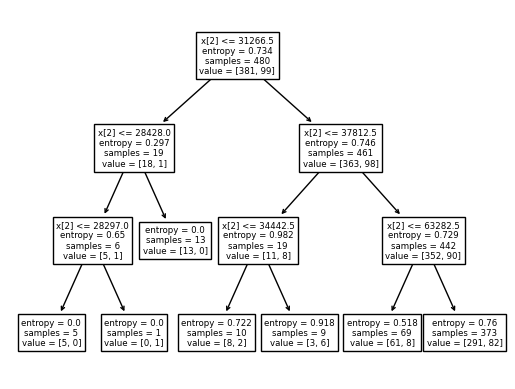

In [35]:
#PLot the decision tree

from sklearn import tree
tree.plot_tree(model);

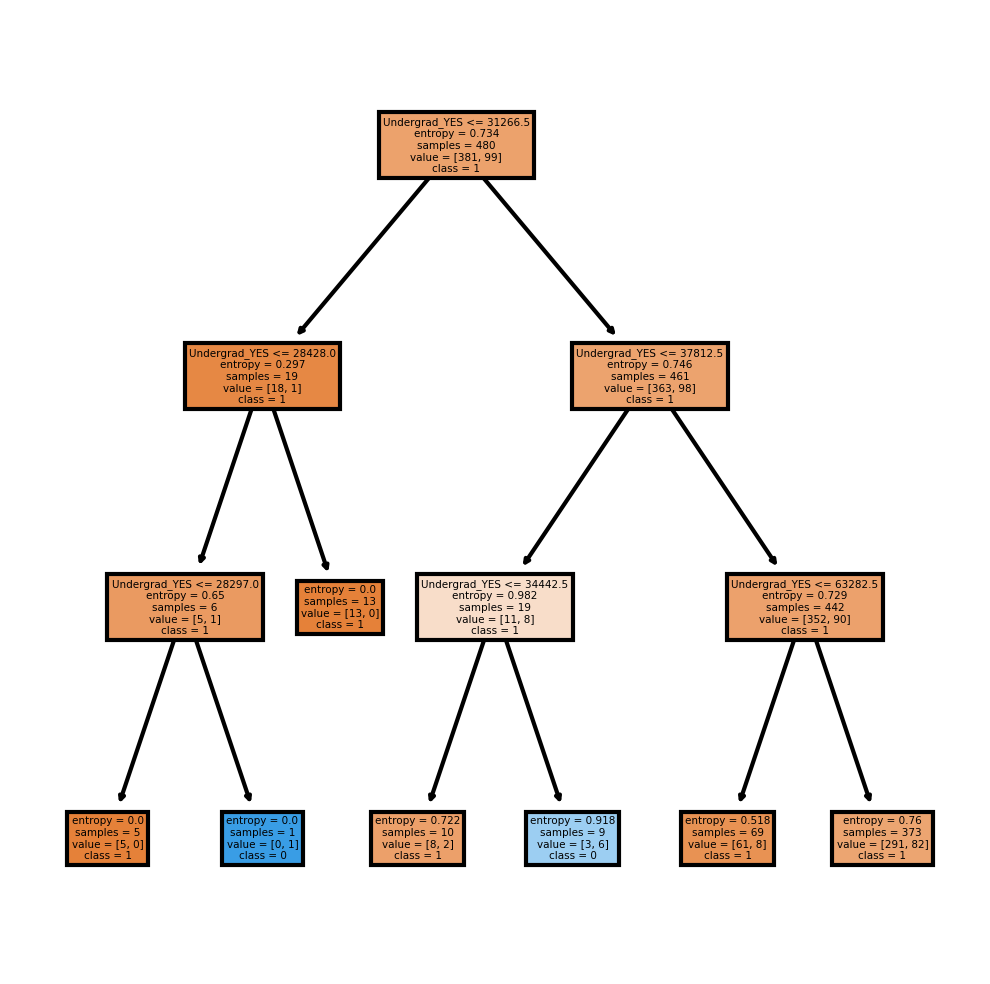

In [36]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [38]:
#Predicting on test data

preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

0    117
1      3
dtype: int64

In [39]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:

pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
taxable_category,,
0,92,3
1,25,0


In [42]:
# Accuracy

np.mean(preds==y_test)

0.7666666666666667

In [43]:
# Building Decision Tree Classifier (CART) using Gini Criteria

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
#Prediction and computing the accuracy

pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667